In [690]:
# The purpose of this program is to demonstrate Support Vector Classifiers and Suppor Vector Machines. We will use a completely fictional dataset in order to demonstrate these points. The dataset will determin whther or not someone enjoys going to music festivals or not. We will based the data on the number of albums that the person has.
#Data reepresents the number of albums each person has.

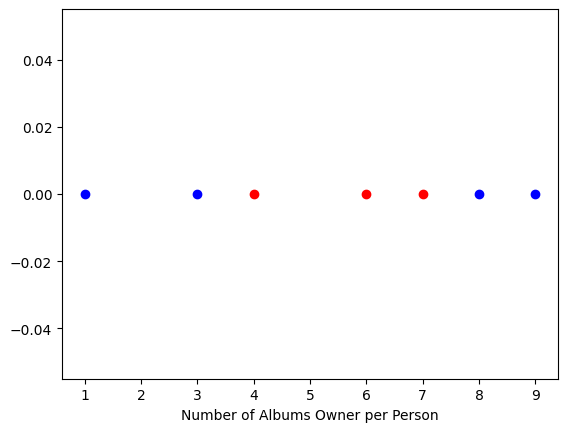

In [691]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

data = [1,3,4,6,7,8,9]
x_1 = data[:2] + data[5:]
x_2 = data[2:5]

y_1 = [0, 0, 0, 0]
y_2 = [0, 0, 0]


# For the sake of this example, we will say that positions 0-4 in the list above love going to music festivals and that positions 10-14 in the list ablve love going to music festivals and that 5-9 do not love going to music festivals
# We want to find that maximal separable hyperplane that fits this data.

#Here is a plot of the data on an x-axis
plt.plot(x_1, y_1, 'bo')
plt.plot(x_2, y_2, 'ro')
plt.xlabel('Number of Albums Owner per Person')
plt.show()

In [692]:
# The blue dots represent the people that love going to music festivals
# The red dots represent the people that do not love going to music festivals
# We need to figure out a good y-axis in order to make a classifier through this data.

In [693]:
# Let set our kernel parameters now. 
# The binomial kernel is represented by (a * b + r)^2. a and b are two different observations, r determines the coefficient and d determines the degree of the polynomial. If we choose r = 1/2 and d = ^2, then (a * b + r)^2 = (a, a^2, 1/2)*(b,  b^2, 1/2) - where the first terms in each equations are the observations, the second term are the y-axis coords, and the third term is the z-axis term.
# We can ignore the third term in each because they are the same for both coordinate values.
# We will take the middle term for each part of the dot product - in this case we will square it. a^2 and b^2
# The radial basis kernel is represented by e**-y(a-b)**2. y is gamma. The best value for gamma can be determined by cross validation. Determine the closes two points to a new point added to the data. The new point then takes on the class of those closes points. Radial Basis is like Polynomial except that r = 0 and d = infinity so that you can find the classifier in infinite dimensions
# Here is a simple function that can help determine the y-axis
def polynomial_kernel(a, b, r, d):
    y = np.dot((a + a**d + r), (b + b**2 + r))
    return y

def degree(a, d):
    return a**d


In [694]:
r = 0.5
d = 2

In [695]:
observations = data
print(observations)

[1, 3, 4, 6, 7, 8, 9]


In [696]:
#Let's get the y values for each observation
y_values = []
x_values = []
for i in range(len(observations)):
    y = degree(observations[i], d)
    y_values.append(y)

for i in range(len(observations) - 1):
    x_dist = polynomial_kernel(observations[i], observations[i+1], r,d)
    x_values.append(x_dist)
print(y_values)
print(x_values)

[1, 9, 16, 36, 49, 64, 81]
[31.25, 256.25, 871.25, 2401.25, 4096.25, 6561.25]


In [697]:
# The x_values represent the distances from one point to the next
# Adding a zero because the distance from one point to itself is zero
x_values.insert(0, 0)
print(x_values)

[0, 31.25, 256.25, 871.25, 2401.25, 4096.25, 6561.25]


[0, 31.25, 4096.25, 6561.25]
[1, 9, 64, 81]
[256.25, 871.25, 2401.25]
[16, 36, 49]


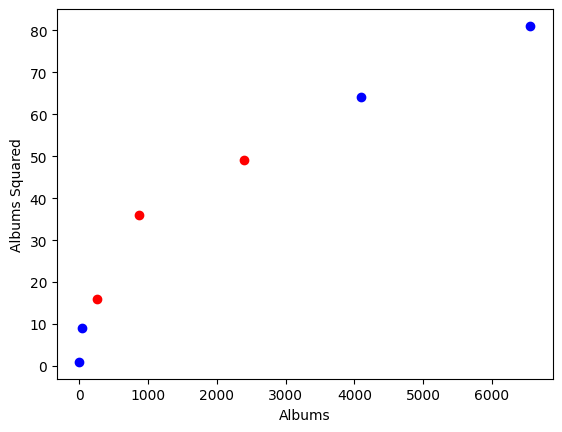

In [698]:
#Now let's plot our data using the newly transformd data. We will separate the data so that we can use different colors for the different classes

x_1 = x_values[:2] + x_values[5:]
x_2 = x_values[2:5]
#x_3 = x_values[10:]

y_1 = y_values[:2] + y_values[5:]
y_2 = y_values[2:5]
#y_3 = y_values[10:]

print(x_1)
print(y_1)
print(x_2)
print(y_2)
plt.plot(x_1, y_1, 'bo')
plt.plot(x_2, y_2, 'ro')
#plt.plot(x_3, y_3, 'bo')
plt.ylabel('Albums Squared')
plt.xlabel('Albums')
plt.show()

In [699]:
# We have take a low dimensional and used Support Vector Machines to separate the different classes
# We can imagine drawing different lines through the data to make the data maximally separated and use cross validation to determine which line gives us the best results